In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/tableau_data/tableau_data.csv')
print("data.shape: ", data.shape)

data.shape:  (115059, 88)


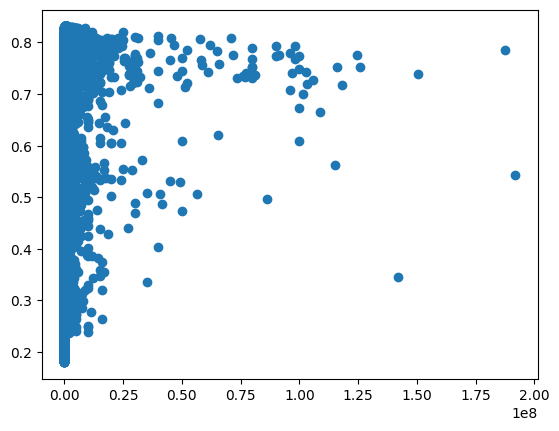

In [3]:
plt.scatter(data.C1_m3, data.prob)

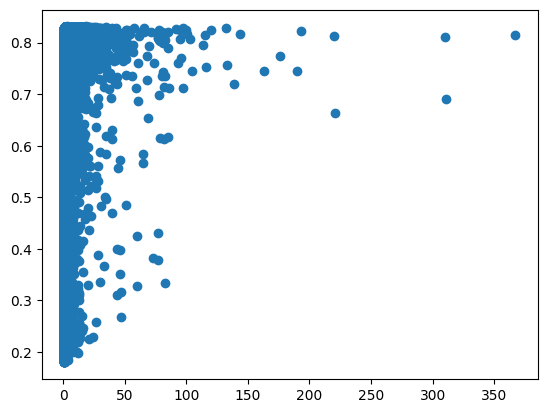

In [4]:
plt.scatter(data.C2_m3, data.prob)

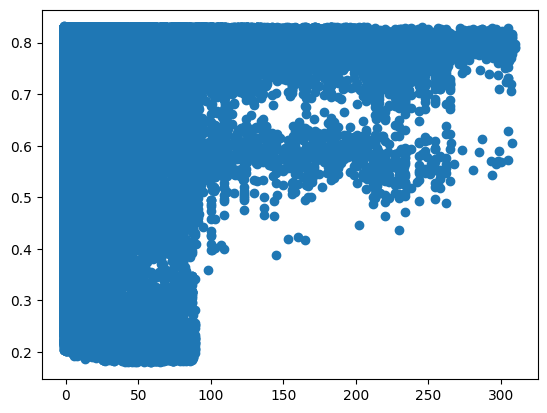

In [5]:
plt.scatter(data.B6_m3, data.prob)

#### 값에 따른 점수 부여

In [6]:
rfm_data = data[['C1_m3', 'C2_m3', 'B6_m3']]

In [7]:
rfm_data.columns = ['Monetary','Frequency', 'Recency']

In [8]:
mone_quan = list(np.quantile(rfm_data.Monetary, q = [0, 0.25, 0.5, 0.75, 1]))
freq_quan = list(np.quantile(rfm_data.Frequency, q = [0, 0.25, 0.5, 0.75, 1]))
recen_quan = list(np.quantile(rfm_data.Recency, q = [0, 0.25, 0.5, 0.75, 1]))

In [9]:
def monetary_score(x):
    if x >= mone_quan[3]: return 4
    elif x >= mone_quan[2]: return 3
    elif x >= mone_quan[1]: return 2
    elif x >= mone_quan[0]: return 1

def frequency_score(x):
    if x >= freq_quan[3]: return 4
    elif x >= freq_quan[2]: return 3
    elif x >= freq_quan[1]: return 2
    elif x >= freq_quan[0]: return 1

def recency_score(x):
    if x <= recen_quan[1]: return 4
    elif x <= recen_quan[2]: return 3
    elif x <= recen_quan[3]: return 2
    elif x <= recen_quan[4]: return 1

In [10]:
rfm_data['monetary_score'] = rfm_data.Monetary.apply(monetary_score)
rfm_data['frequency_score'] = rfm_data.Frequency.apply(frequency_score)
rfm_data['recency_score'] = rfm_data.Recency.apply(recency_score)

/Users/yschoi/bitamin/ChurnProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yschoi/bitamin/ChurnProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yschoi/bitamin/ChurnProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [11]:
rfm_data['rfm_score'] = rfm_data.monetary_score + rfm_data.frequency_score + rfm_data.recency_score

/Users/yschoi/bitamin/ChurnProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
rfm_data

,Monetary,Frequency,Recency,monetary_score,frequency_score,recency_score,rfm_score
0,50024.17,2.0,205,2,3,1,6
1,420114.56,7.0,-1,4,4,4,12
2,67007.14,2.0,5,3,3,3,9
3,610.81,1.0,-1,1,2,4,7
4,4781.40,1.0,8,2,2,3,7
...,...,...,...,...,...,...,...
115054,20000.21,2.0,265,2,3,1,6
115055,50003.17,2.0,46,2,3,2,7
115056,80002.53,2.0,30,3,3,2,8
115057,200010.95,2.0,0,3,3,4,10


In [13]:
rfm_data = pd.concat([rfm_data, data.cust_no], axis = 1)

In [14]:
rfm_data.Recency = rfm_data.Recency + 1

In [15]:
rfm_data

,Monetary,Frequency,Recency,monetary_score,frequency_score,recency_score,rfm_score,cust_no
0,50024.17,2.0,206,2,3,1,6,0xb2d283b6
1,420114.56,7.0,0,4,4,4,12,0xb2d62fab
2,67007.14,2.0,6,3,3,3,9,0xb2d69cdb
3,610.81,1.0,0,1,2,4,7,0xb2d942e8
4,4781.40,1.0,9,2,2,3,7,0xb2d9156f
...,...,...,...,...,...,...,...,...
115054,20000.21,2.0,266,2,3,1,6,0xb2d6bad9
115055,50003.17,2.0,47,2,3,2,7,0xb2d90bd5
115056,80002.53,2.0,31,3,3,2,8,0xb2d9359c
115057,200010.95,2.0,1,3,3,4,10,0xb2d92d05d


In [16]:
rfm_data.to_csv('../data/tableau_data/rfm_data.csv', index = None)

### sampling

In [26]:
import random


In [21]:
pd.concat([rfm_data, data.label], axis = 1)

,Monetary,Frequency,Recency,monetary_score,frequency_score,recency_score,rfm_score,cust_no,label
0,50024.17,2.0,206,2,3,1,6,0xb2d283b6,1.0
1,420114.56,7.0,0,4,4,4,12,0xb2d62fab,1.0
2,67007.14,2.0,6,3,3,3,9,0xb2d69cdb,1.0
3,610.81,1.0,0,1,2,4,7,0xb2d942e8,-1.0
4,4781.40,1.0,9,2,2,3,7,0xb2d9156f,1.0
...,...,...,...,...,...,...,...,...,...
115054,20000.21,2.0,266,2,3,1,6,0xb2d6bad9,1.0
115055,50003.17,2.0,47,2,3,2,7,0xb2d90bd5,1.0
115056,80002.53,2.0,31,3,3,2,8,0xb2d9359c,1.0
115057,200010.95,2.0,1,3,3,4,10,0xb2d92d05d,1.0


In [29]:
label1_data_idx = random.sample(list(data.label[data.label == 1].index), 5000)
label0_data_idx = random.sample(list(data.label[data.label == -1].index), 5000)

In [33]:
rfm1 = rfm_data.iloc[label1_data_idx]
rfm0 = rfm_data.iloc[label0_data_idx]

In [35]:
rfm_sample = pd.concat([rfm1, rfm0])
rfm_sample = rfm_sample.to_csv('./tmp_data/rfm_data_sample.csv')